# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.12.0)


### Import Statements

In [328]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [333]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [614]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_data.shape

(4324, 9)

In [5]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [6]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [7]:
print(f"Dataset has {df_data.shape[0]} rows and {df_data.shape[1]} columns")

Dataset has 4324 rows and 9 columns


In [10]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [15]:
print(f"Are there any missing values in the dataset: {df_data.isna().values.any()}")
print(f"Are there any duplicated values in the dataset: {df_data.duplicated().values.any()}")

Are there any missing values in the dataset: True
Are there any duplicated values in the dataset: False


In [12]:
df_data.count()

Unnamed: 0.1      4324
Unnamed: 0        4324
Organisation      4324
Location          4324
Date              4324
Detail            4324
Rocket_Status     4324
Price              964
Mission_Status    4324
dtype: int64

### Columns Analysis ###
Based on the dataset values there is only missing values in the Price Column however we are going to keep the column for analysis.
Unnamed: 0.1 and Unnamed: 0 don't have any missing values however their value is a consecutive integer, These columns will be removed.

In [615]:
df_data.drop(labels=['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [20]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [22]:
df_data['Detail'].nunique()

4278

In [23]:
df_data['Detail'].value_counts()

Detail
Cosmos-3MRB (65MRB) | BOR-5 Shuttle    6
Lambda-IV S | Osumi                    5
Titan IV(402)B | DSP                   5
Titan IIID | KH-11                     5
Proton K/Block D | Zond                4
                                      ..
Ariane 44P | Intelsat 709              1
Ariane 5 G | Cluster                   1
Delta II 7925 | Galaxy 9               1
Space Shuttle Endeavour | STS-77       1
Sputnik 8K71PS | Sputnik-1             1
Name: count, Length: 4278, dtype: int64

In [24]:
df_data[df_data['Detail'] == 'Cosmos-3MRB (65MRB) | BOR-5 Shuttle']

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1940,RVSN USSR,"Site 86/1, Kapustin Yar, Russia","Wed Jun 22, 1988",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,NaN,Success
1983,RVSN USSR,"Site 86/1, Kapustin Yar, Russia","Thu Aug 27, 1987",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,NaN,Success
2024,RVSN USSR,"Site 86/1, Kapustin Yar, Russia","Thu Dec 25, 1986 23:59 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,NaN,Success
2139,RVSN USSR,"Site 86/1, Kapustin Yar, Russia","Wed Apr 17, 1985",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,NaN,Success
2199,RVSN USSR,"Site 86/1, Kapustin Yar, Russia","Wed Jun 06, 1984",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,NaN,Success
2270,RVSN USSR,"Site 86/1, Kapustin Yar, Russia","Wed May 04, 1983",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,NaN,Success


### Note ###
Double checking if there is no duplicated rows. Noticed some duplicated Detail values however those are completely different launches.

In [47]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


### Note ###
Columns are strings, Date and Price will be converted from string to the corresponding data type.

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [26]:
df_LaunchCop = df_data['Organisation'].value_counts()
df_LaunchCop.head()

Organisation
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
Name: count, dtype: int64

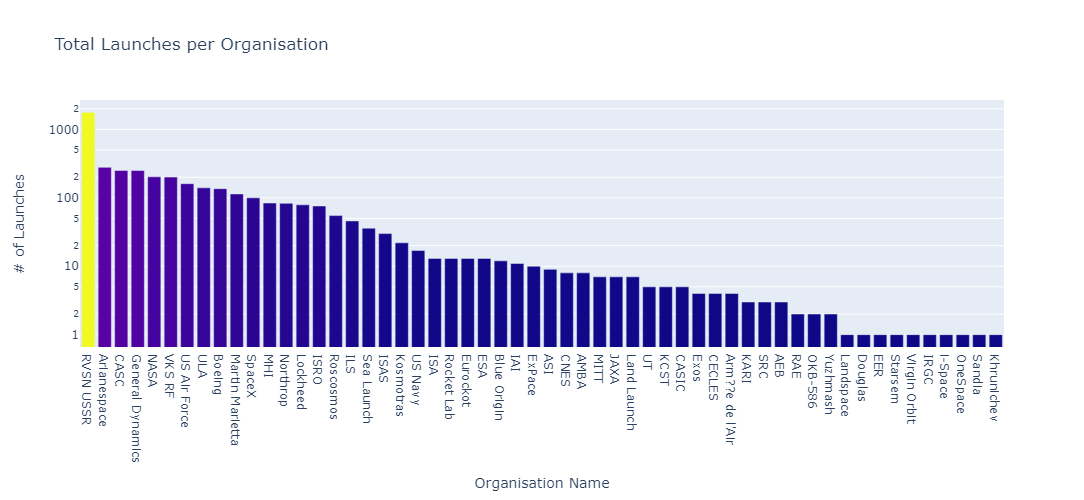

<Figure size 3200x1600 with 0 Axes>

In [34]:
plt.figure(figsize=(16,8), dpi=200)
bar_org = px.bar(df_LaunchCop, 
                 x=df_LaunchCop.index, 
                 y=df_LaunchCop.values, 
                 color=df_LaunchCop.values, 
                 color_continuous_scale='plasma',
                 height=500,
                 title='Total Launches per Organisation')
bar_org.update_layout(xaxis_title='Organisation Name', 
                     yaxis_title='# of Launches', 
                     coloraxis_showscale=False,
                     yaxis=dict(type='log'))
                    
bar_org.show()

### Note ###
USSR is by far the organization with the most launches with 1777. Suprinsingly NASA only has 203 launches being the most famous organisation.

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [36]:
df_status = df_data['Rocket_Status'].value_counts()
df_status

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

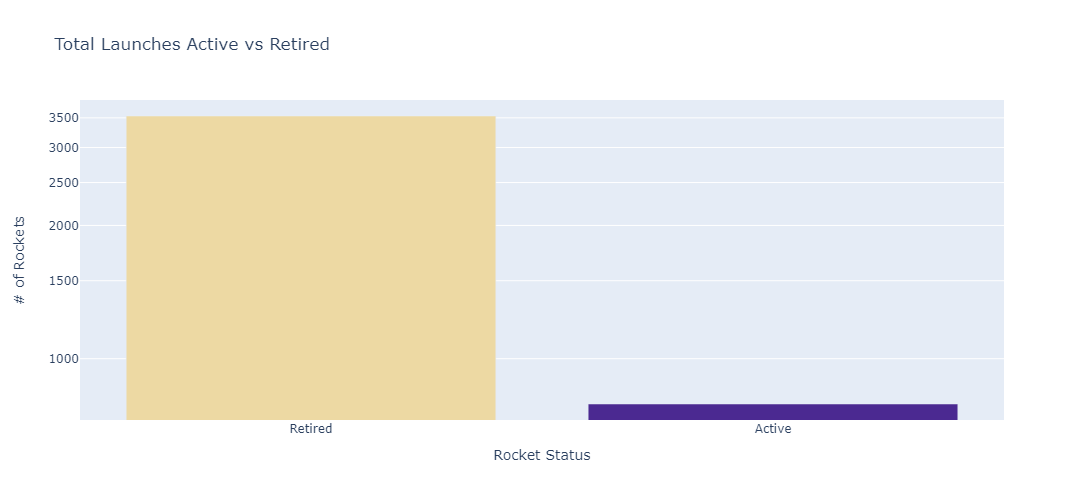

<Figure size 1400x600 with 0 Axes>

In [39]:
plt.figure(figsize=(14,6), dpi=100)
bar_status = px.bar(df_status, 
                 x=['Retired', 'Active'], 
                 y=df_status.values, 
                 color=df_status.values, 
                 color_continuous_scale='agsunset',
                 height=500,
                 title='Total Launches Active vs Retired')
bar_status.update_layout(xaxis_title='Rocket Status', 
                     yaxis_title='# of Rockets', 
                     coloraxis_showscale=False,
                     yaxis=dict(type='log'))
                    
bar_status.show()

### Note ###
Most of the Rockets have a Retired status with only 790 Active

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [40]:
df_outcome = df_data['Mission_Status'].value_counts()
df_outcome

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

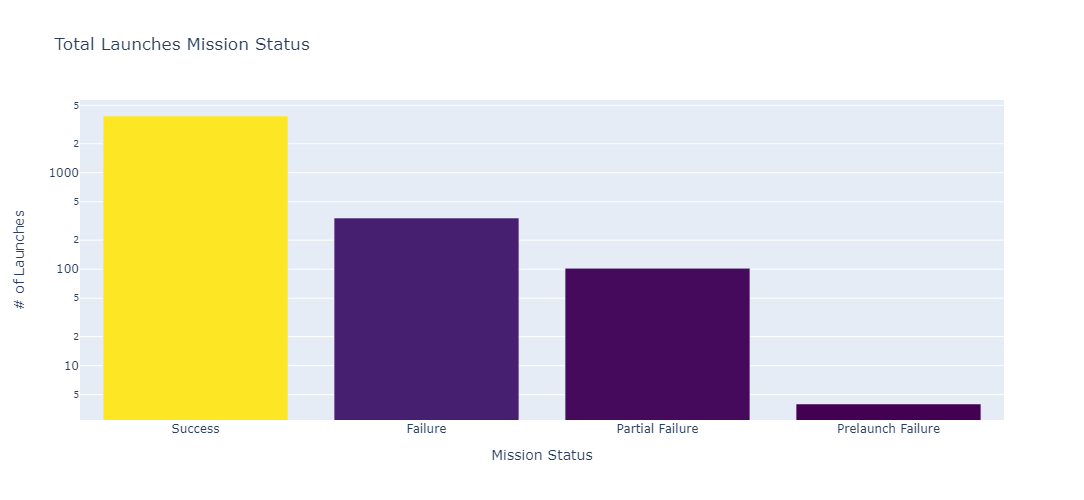

<Figure size 1400x600 with 0 Axes>

In [41]:
plt.figure(figsize=(14,6), dpi=100)
bar_outcome = px.bar(df_outcome, 
                 x=df_outcome.index, 
                 y=df_outcome.values, 
                 color=df_outcome.values, 
                 color_continuous_scale='viridis',
                 height=500,
                 title='Total Launches Mission Status')
bar_outcome.update_layout(xaxis_title='Mission Status', 
                     yaxis_title='# of Launches', 
                     coloraxis_showscale=False,
                     yaxis=dict(type='log'))
                    
bar_outcome.show()

### Note ###
The missions have been succesfully launched sadly there are more than 400 failures.

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [616]:
# convert price to float
df_data['Price'] =  df_data['Price'].str.replace(',','').astype(np.float64)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           964 non-null    float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


In [53]:
df_price = df_data[df_data['Price'].notna()].sort_values('Price')
df_price.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
102,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Thu Sep 19, 2019 06:42 UTC",Long March 11 | Zhuhai-1 Group 03,StatusActive,5.30,Success
281,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jan 19, 2018 04:12 UTC","Long March 11 | Jilin-1 07, 08 & Others",StatusActive,5.30,Success
26,CASC,"Xichang Satellite Launch Center, China","Fri May 29, 2020 20:13 UTC",Long March 11 | XJS-G and XJS-H,StatusActive,5.30,Success
176,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Dec 21, 2018 23:51 UTC",Long March 11 | Hongyun-1,StatusActive,5.30,Success
487,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Sep 25, 2015",Long March 11 | Pujian 1 & Others,StatusActive,5.30,Success


In [55]:
df_price.tail()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Mar 03, 1969 16:00 UTC",Saturn V | Apollo 9,StatusRetired,"1,160.00",Success
3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Nov 14, 1969 16:22 UTC",Saturn V | Apollo 12,StatusRetired,"1,160.00",Success
3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,StatusRetired,"1,160.00",Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.00",Success


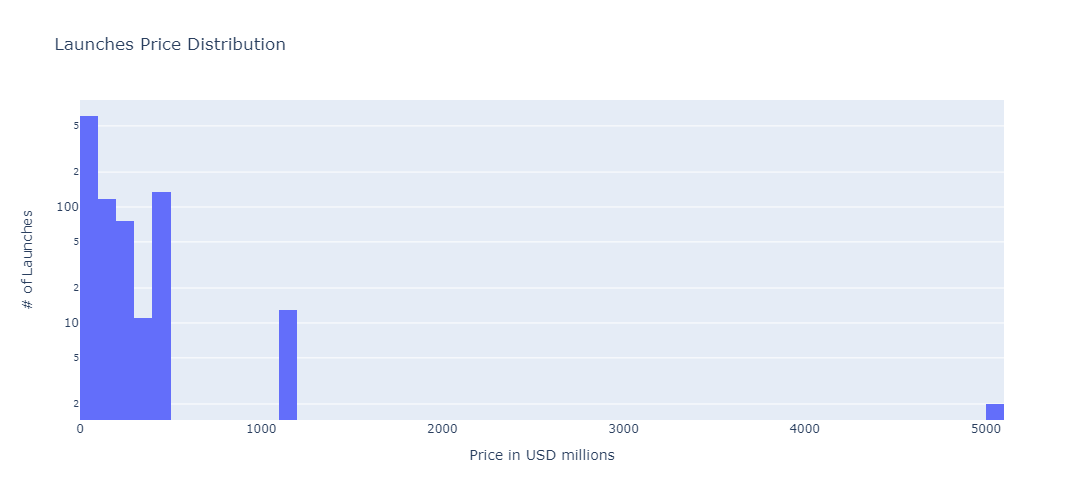

In [59]:
bar_price = px.histogram(df_price, 
                         x=df_price['Price'], 
                         height=500,
                         nbins=50,
                         title='Launches Price Distribution')
bar_price.update_layout(xaxis_title='Price in USD millions', 
                        yaxis_title='# of Launches', 
                        coloraxis_showscale=False,
                        yaxis=dict(type='log'))
                    
bar_price.show()

### Note ###
Only 964 of the Launches have price cost mission. I decided to make a histogram only with the launches with available Price just to have an idea of the cost of a launch. It is interesting that recent China launches are cheaper costing 5.3 USD millions against the latest USSR launches that costed 5,000 USD millions. 

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

### Note ###
First a dictionary with the names of the countries to be replaced is created. Then the name of the country is extracted from the Location column, the string is split using ',' comma and the last value for the list is retrieved. Strip is applied to remove the space betwen the comma and the Country's name.
After this step the lambda function is aplied to the new Country column to replace the value for the correct Country's name in case that the value is found in the dictionary.
Finally the Alpha 3 format for the Country's name is obatined using the iso3166 package using a lambda function and the countries.get() function, with the ISO column then the Choroplet map can be visualized.

In [183]:
countrymap = {'Russia':'Russian Federation','New Mexico':'USA','Yellow Sea':'China',
              'Shahrud Missile Test Site':'Iran, Islamic Republic of','Pacific Missile Range Facility':'USA',
              'Barents Sea':'Russian Federation','Gran Canaria':'USA', 'Pacific Ocean': 'Ukraine', 'Iran':'Iran, Islamic Republic of',
              'North Korea': 'Korea, Democratic People\'s Republic of', 'South Korea': 'Korea, Republic of'}

In [617]:
df_data['Country'] =df_data['Location'].apply(lambda location: location.split(',')[-1].strip())
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [618]:
df_data['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [619]:
df_data['Country'] = df_data['Country'].apply(lambda location: countrymap[location] if location in countrymap else location)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [620]:
df_data['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Iran, Islamic Republic of', 'France',
       'India', "Korea, Democratic People's Republic of", 'Ukraine',
       'Korea, Republic of', 'Brazil', 'Kenya', 'Australia'], dtype=object)

In [621]:
countries.get('KOR')

Country(name='Korea, Republic of', alpha2='KR', alpha3='KOR', numeric='410', apolitical_name='Korea, Republic of')

In [622]:
df_data['ISO'] = df_data['Country'].apply(lambda country: countries.get(country)[2])

In [623]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA


In [609]:
df_ISO = df_data[['Country', 'ISO']].value_counts()
df_ISO = df_ISO.reset_index()
df_ISO

,Country,ISO,count
0,Russian Federation,RUS,1398
1,USA,USA,1351
2,Kazakhstan,KAZ,701
3,France,FRA,303
4,China,CHN,269
5,Japan,JPN,126
6,India,IND,76
7,Ukraine,UKR,36
8,"Iran, Islamic Republic of",IRN,14
9,New Zealand,NZL,13


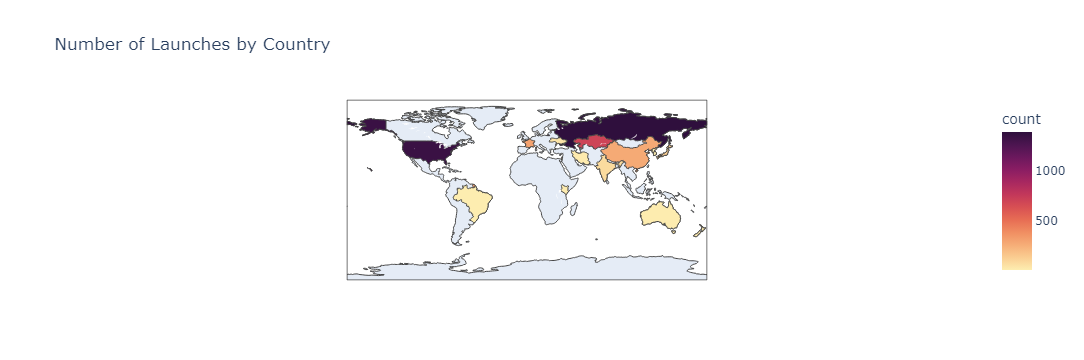

<Figure size 2800x1200 with 0 Axes>

In [610]:
plt.figure(figsize=(14,6), dpi=200)
map_fig = px.choropleth(df_ISO, 
                      locations='ISO', 
                      hover_name='Country', 
                      color='count', 
                      color_continuous_scale='matter',
                      title='Number of Launches by Country')
map_fig.update_layout(coloraxis_showscale=True)
map_fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


### Note ###
The Map only represents the Mission_Status set to 'Failure' however in the TODO list is to create a Map that includes the 'Partial failures' and 'Prelaucn Failure'

In [608]:
df_failures = df_data[df_data['Mission_Status'] == 'Failure']
df_fail_cnt = df_failures.groupby(['Country', 'ISO'], as_index=False).agg({'Mission_Status': pd.Series.count})
df_fail_cnt = df_fail_cnt.sort_values(by='Mission_Status', ascending=False)
df_fail_cnt.columns= ['Country', 'ISO', 'Nbr. Failures']
df_fail_cnt

,Country,ISO,Nbr. Failures
13,USA,USA,129
8,Kazakhstan,KAZ,72
12,Russian Federation,RUS,63
2,China,CHN,19
3,France,FRA,13
7,Japan,JPN,10
4,India,IND,8
5,"Iran, Islamic Republic of",IRN,8
0,Australia,AUS,3
9,"Korea, Democratic People's Republic of",PRK,3


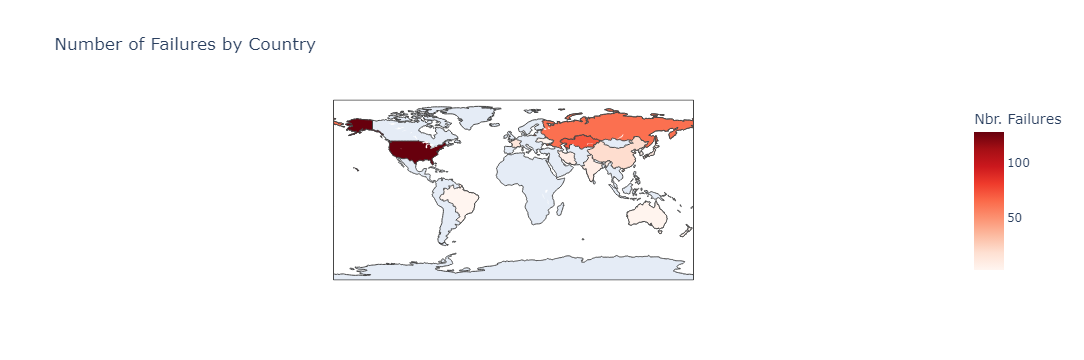

<Figure size 2800x1200 with 0 Axes>

In [607]:
plt.figure(figsize=(14,6), dpi=200)
map_fail = px.choropleth(df_fail_cnt, 
                      locations='ISO', 
                      hover_name='Country', 
                      color='Nbr. Failures', 
                      color_continuous_scale='reds',
                      title='Number of Failures by Country')
fig_sbt.update_layout(margin=dict(t=40, l=0, r=0, b=10),
                     coloraxis_showscale=True)
map_fail.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [624]:
df_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status', 'Country', 'ISO'],
      dtype='object')

In [219]:
df_sbt = df_data.groupby(['Country', 'Organisation', 'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count})
df_sbt

,Country,Organisation,Mission_Status,Detail
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1
...,...,...,...,...
127,USA,US Navy,Partial Failure,1
128,USA,US Navy,Success,2
129,USA,Virgin Orbit,Failure,1
130,Ukraine,Sea Launch,Failure,3


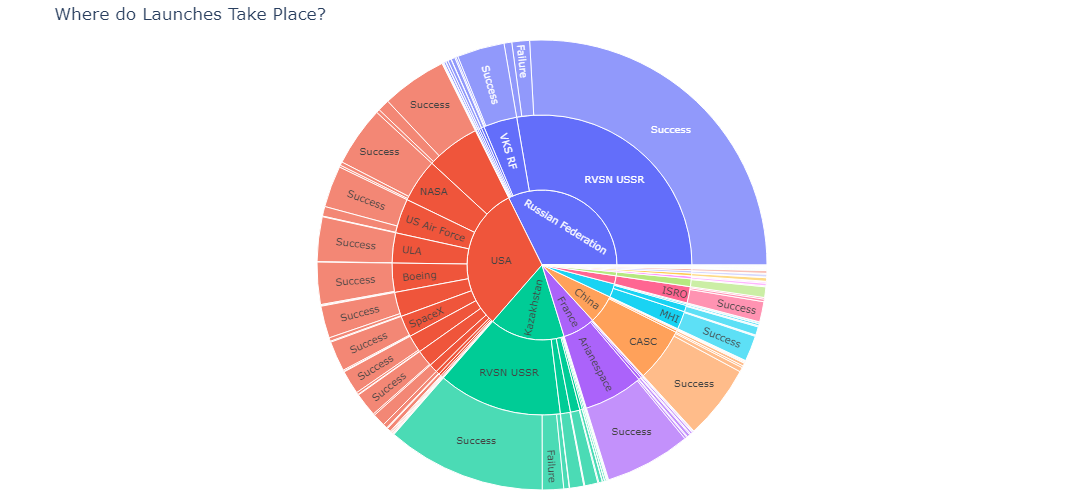

In [233]:
fig_sbt = px.sunburst(df_sbt, 
                  path=['Country', 'Organisation', 'Mission_Status'], 
                  values='Detail',
                  height=500,
                  title='Where do Launches Take Place?')
fig_sbt.update_layout(margin=dict(t=40, l=0, r=0, b=10), uniformtext=dict(minsize=10, mode='hide'),
                     coloraxis_showscale=False)
fig_sbt.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

### Note ##
Again the dataset only includes the Launches with Price different to NaN.

In [254]:
df_money = df_price.groupby('Organisation', as_index=False).agg({'Price': pd.Series.sum})
df_money.sort_values('Price', ascending=False, inplace=True)
df_money

,Organisation,Price
14,NASA,"76,280.00"
0,Arianespace,"16,345.00"
21,ULA,"14,798.00"
16,RVSN USSR,"10,000.00"
2,CASC,"6,340.26"
20,SpaceX,"5,444.00"
15,Northrop,"3,930.00"
12,MHI,"3,532.50"
8,ISRO,"2,177.00"
22,US Air Force,"1,550.92"


### Note ###
NASA is by far the organisation that spends the most of money in space mission with a total of \\$76,280 USD millions in comparison with USSR that has the most number of mission with \\$10,000 USD millions. At least is the information that the dataset that only includes Prices returns.

# Analyse the Amount of Money Spent by Organisation per Launch

### Note ###
Only working with the Price dataset.
First the objective is the get total launches per Organisation.
Second merged this dataset with the previous dataset that has the total money spent by Organisation
Finally create a new column that has the calculation of the total price divided by the total of launches to obtained the Money spent by Ogranisation
per Launch.

In [251]:
df_moneylaunch = df_price.groupby('Organisation', as_index=False).agg({'Detail': pd.Series.count})
df_moneylaunch.sort_values('Detail', ascending=False, inplace=True)
df_moneylaunch

,Organisation,Detail
2,CASC,158
14,NASA,149
20,SpaceX,99
21,ULA,98
0,Arianespace,96
15,Northrop,83
8,ISRO,67
12,MHI,37
23,VKS RF,33
22,US Air Force,26


In [247]:
df_money.index

RangeIndex(start=0, stop=25, step=1)

In [256]:
df_calc = df_moneylaunch.merge(df_money, on='Organisation')

In [261]:
df_calc['Cost Per Launch'] = df_calc['Price']/df_calc['Detail'] 
df_calc.sort_values('Cost Per Launch', ascending=False)

,Organisation,Detail,Price,Cost Per Launch
19,RVSN USSR,2,"10,000.00","5,000.00"
1,NASA,149,"76,280.00",511.95
17,Boeing,7,"1,241.00",177.29
4,Arianespace,96,"16,345.00",170.26
3,ULA,98,"14,798.00",151.00
12,ILS,13,"1,320.00",101.54
7,MHI,37,"3,532.50",95.47
15,Martin Marietta,9,721.40,80.16
9,US Air Force,26,"1,550.92",59.65
18,JAXA,3,168.00,56.00


### Note ###
First when the total cost of missions dataset informs us that the NASA was the organisation that spends the most money in missions when the USSR has more number of launches but after analysing the cost per launch we noticed that the USSR only has registered the cost of 2 launches a cost of \\$5,000 USD millions per launche and the NASA has registered the cost of 149 launches, spending \\$511.95 USD millions per mission, so it looks like USSR missions were very expensive this organisation launched 1198 missions, the amount of money that Russia spent must be enormous. Also NASA is the organisation that has the most information about costs available, contrary to Russia.

# Chart the Number of Launches per Year

### Note ###
This column was very difficult to convert to a datetime column since the format was different various rows and also the UTC was not always present.

In [625]:
df_data['Date'] = pd.to_datetime(df_data['Date'], format='mixed', utc=True) # Convert to the same time zone

In [626]:
df_data['Mission Year'] = df_data['Date'].dt.year
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Mission Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020


In [642]:
df_year = df_data.groupby('Mission Year', as_index=False).agg({'Detail': pd.Series.count})
df_year.sort_values('Mission Year', inplace=True)
df_year.head()

,Mission Year,Detail
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52


In [637]:
df_year.index.min()

1957

In [629]:
# Create locators for ticks on the time axis
years = np.arange(1955, 2021, 5)
years

array([1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020])

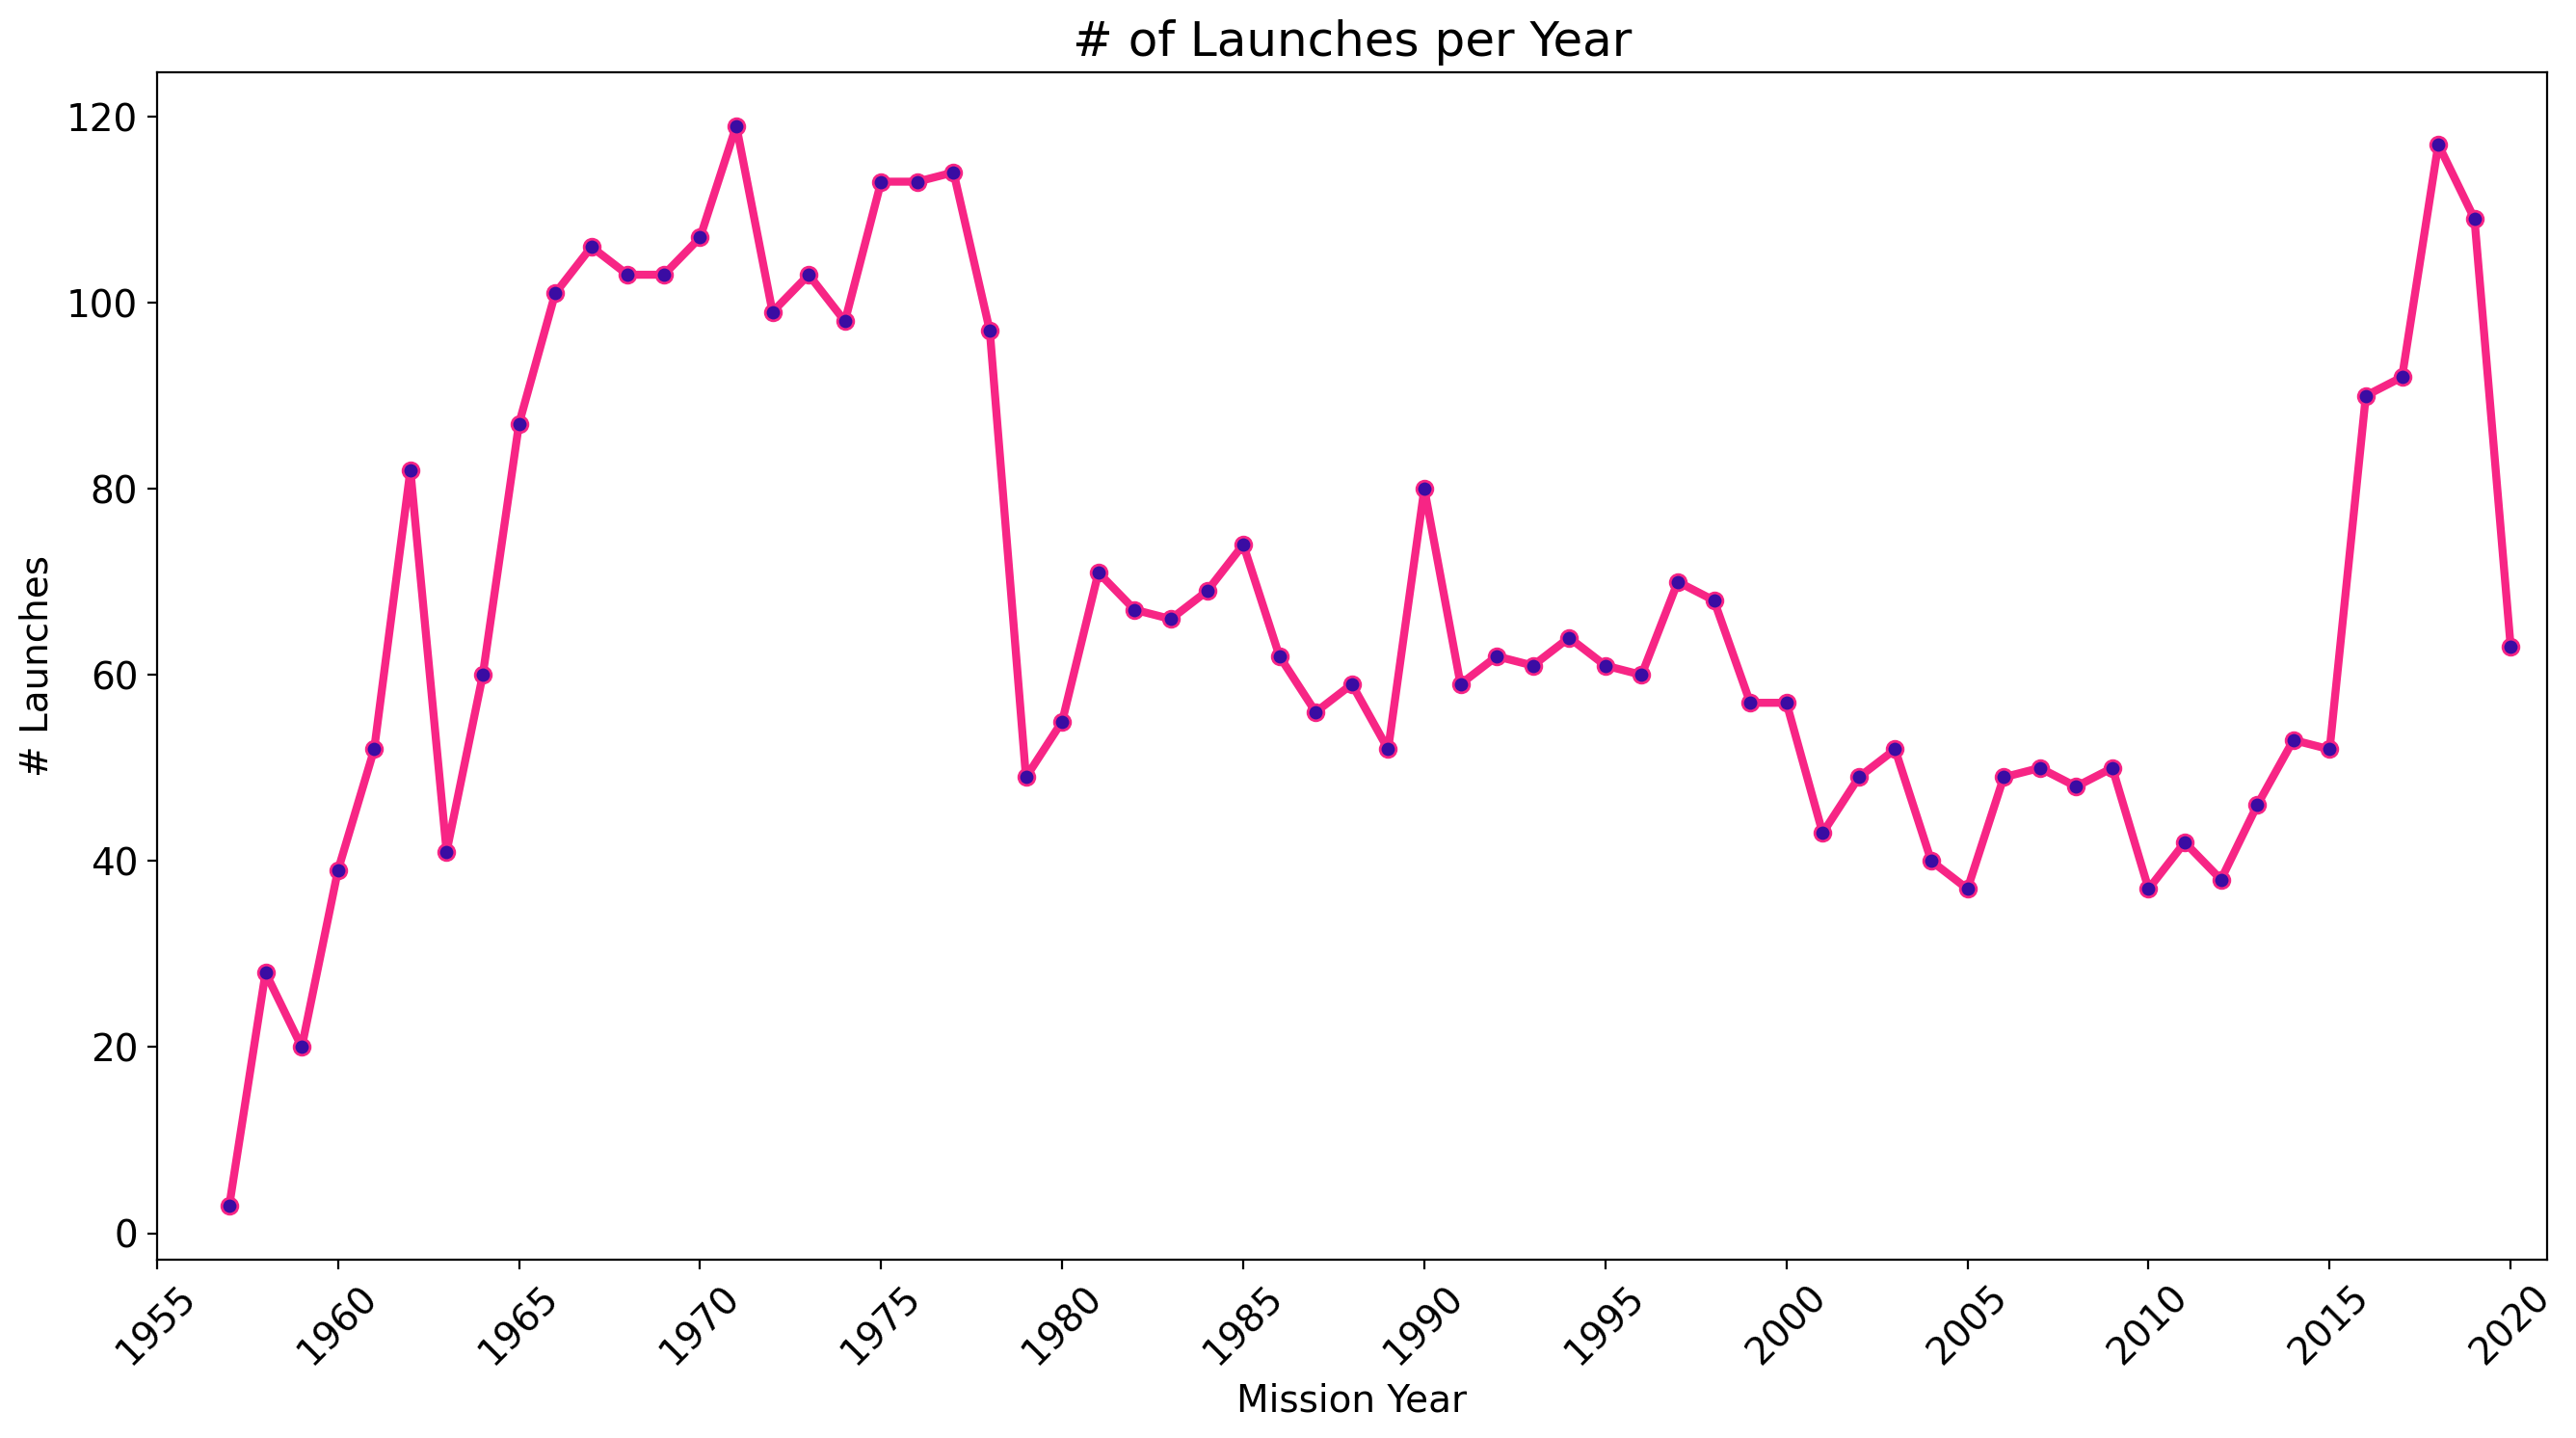

In [647]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('# of Launches per Year', fontsize=18)
plt.xticks(ticks=years, fontsize=14, rotation=45) # create ticks 
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax1.set_xlim(1955, 2021)



ax1.plot(df_year['Mission Year'], 
            df_year['Detail'],
            color='#f72585', 
            marker='o', 
            markerfacecolor='#3a0ca3',
            linewidth=3)

ax1.set_xlabel('Mission Year', fontsize=14)
ax1.set_ylabel('# Launches', fontsize=14)

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [364]:
#df_data['Year_Month'] = df_data['Date'].dt.strftime('%Y-%m')
df_data['Year_Month'] = df_data['Date'].dt.month
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Mission Year,Year_Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,7


In [391]:
df_monthly= df_data.groupby('Year_Month', as_index=False).agg({'Detail': pd.Series.count})
df_monthly.sort_values('Year_Month', inplace=True)
df_monthly

,Year_Month,Detail
0,1,268
1,2,336
2,3,353
3,4,383
4,5,326
5,6,402
6,7,351
7,8,373
8,9,365
9,10,381


In [370]:
months = np.arange(1, 13)
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [400]:
df_rollm = df_monthly.rolling(window=4, on='Year_Month').mean()
df_rollm

,Year_Month,Detail
0,1,NaN
1,2,NaN
2,3,NaN
3,4,335.00
4,5,349.50
5,6,366.00
6,7,365.50
7,8,363.00
8,9,372.75
9,10,367.50


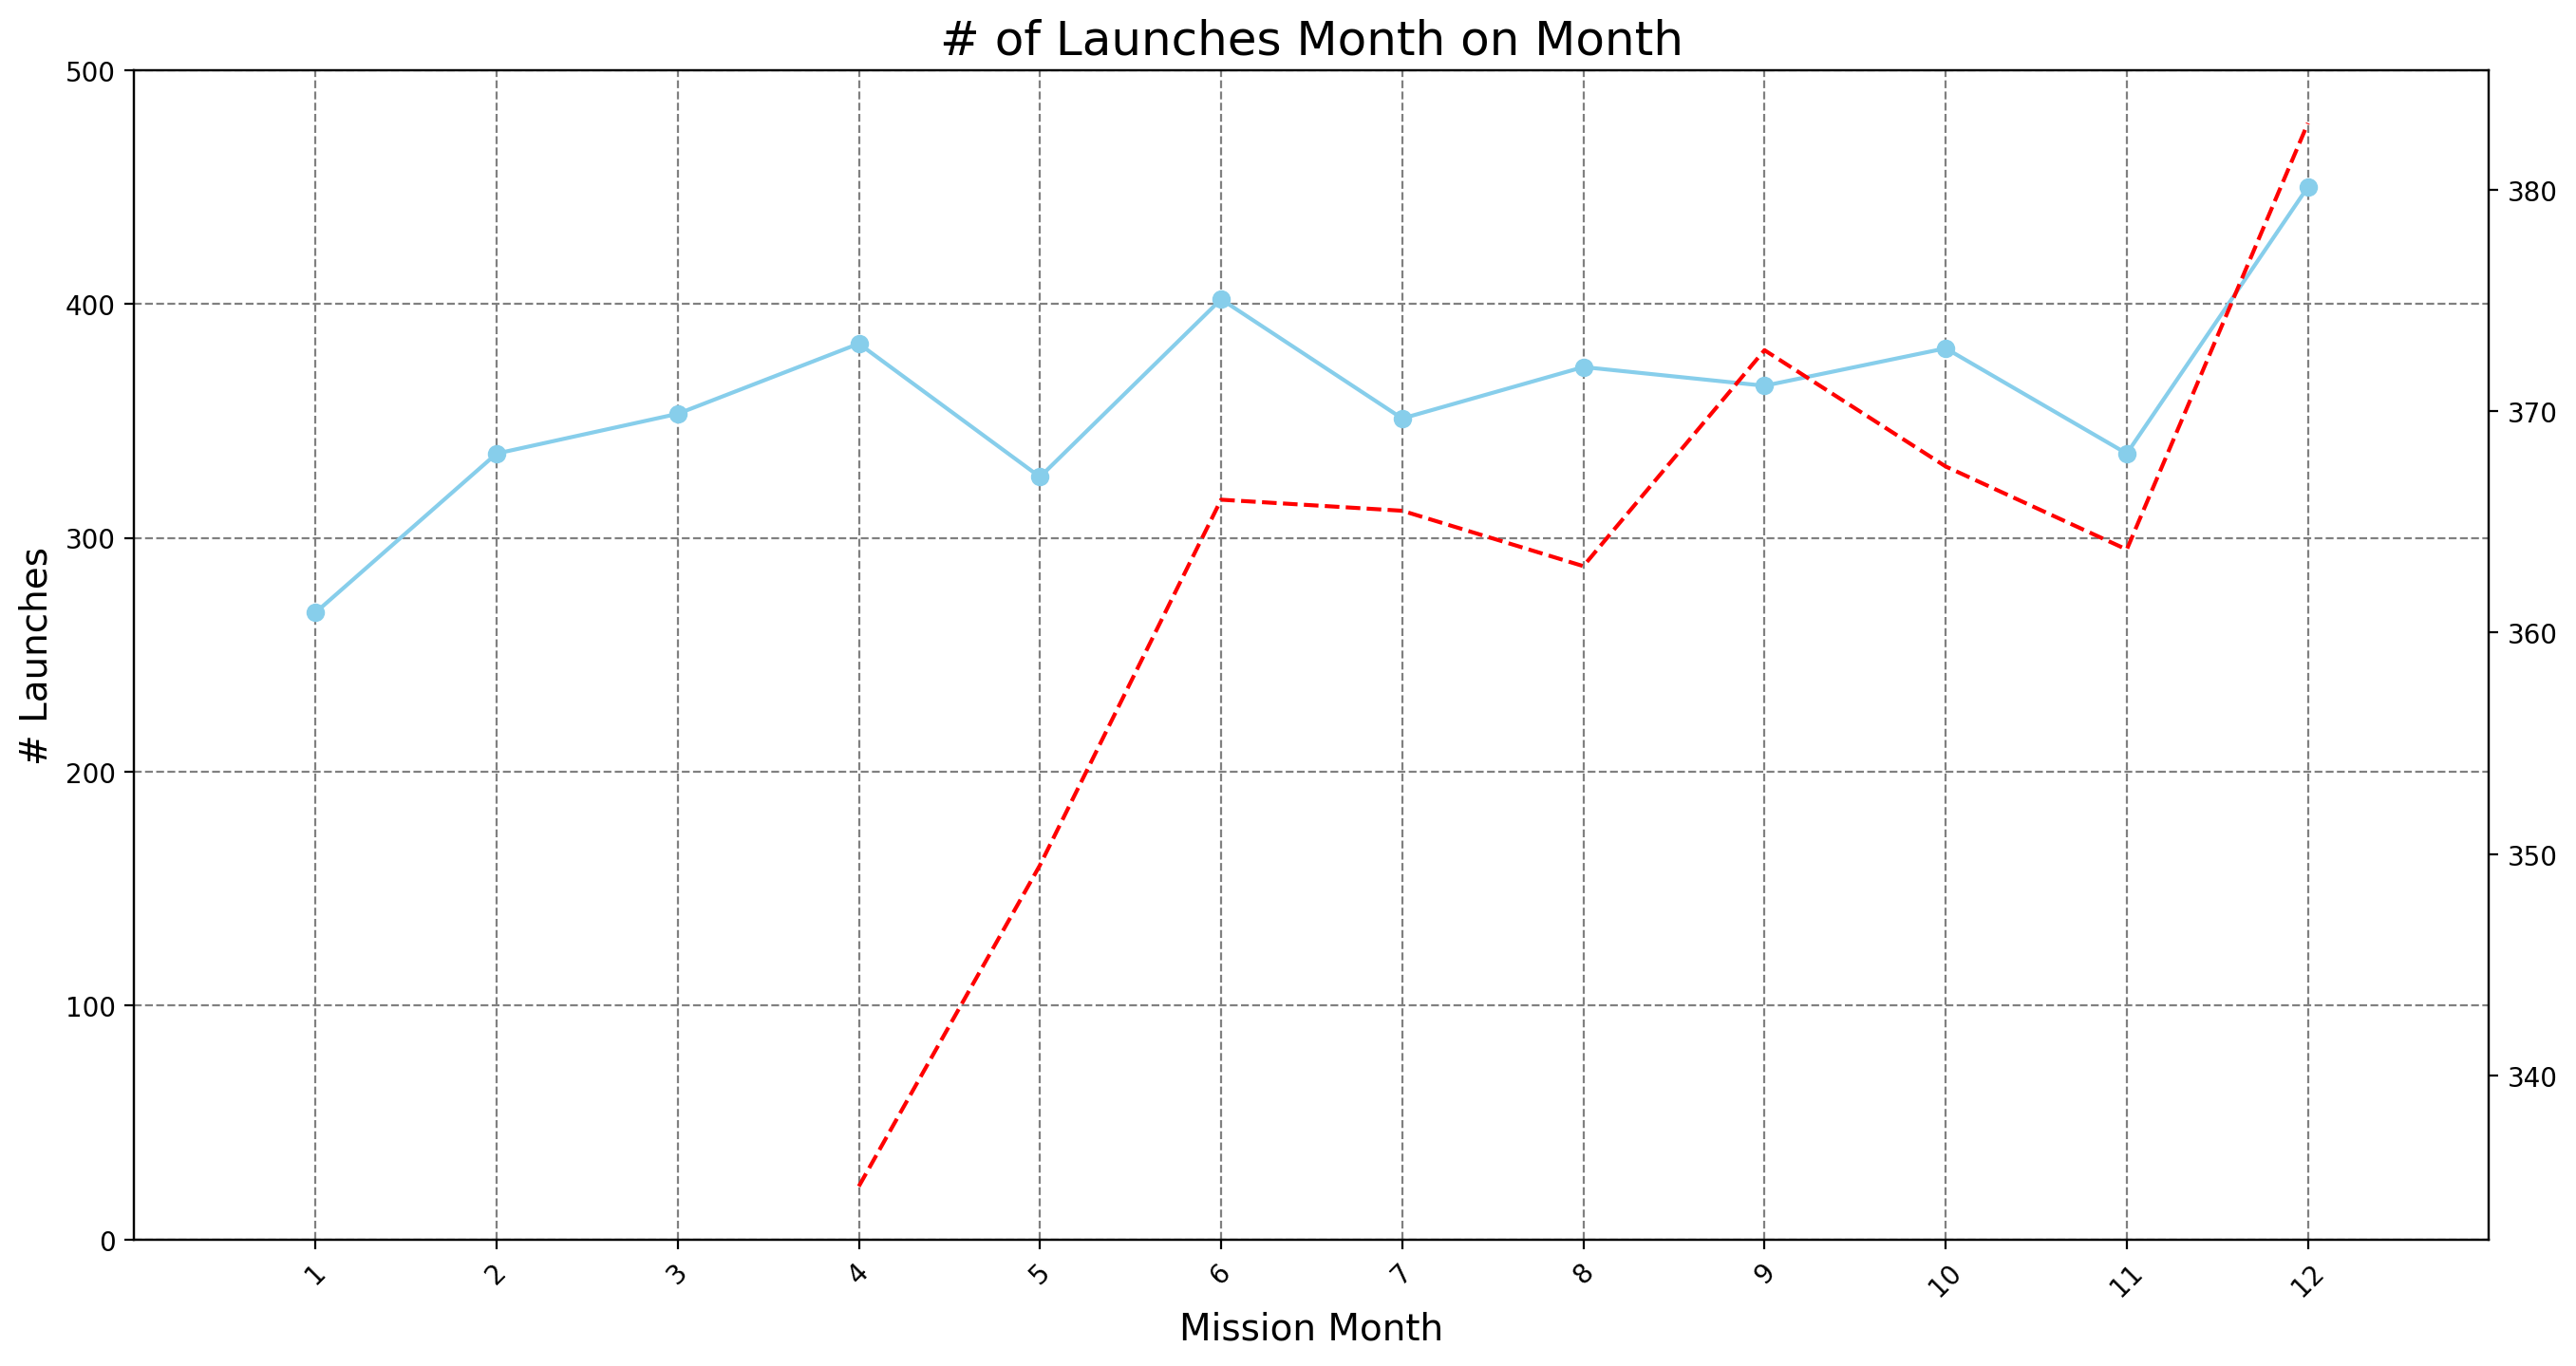

In [401]:
plt.figure(figsize=(16,8), dpi=200)
plt.xticks(ticks=months, fontsize=10, rotation=45) # create ticks 
plt.yticks(fontsize=10)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_monthly['Year_Month'], df_monthly['Detail'], color='skyblue', marker='o')
ax2.plot(df_rollm['Year_Month'], df_rollm['Detail'], color='red', linestyle='--')
ax1.grid(color='grey', linestyle='--')

ax1.set_xlabel('Mission Month', fontsize=14)
ax1.set_ylabel('# Launches', fontsize=14)

# set Set the minimun and maximun values on the axes
ax1.set_xlim([0, 13])
ax1.set_ylim([0, 500])

plt.title('# of Launches Month on Month', fontsize=18)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

### Note ###
I am not very happy with this chart I don't see how the rolling can help us to understand better the information.
Based on the graph December and June are the best months to launch rockets it is interesting since for the north hemisphere where USA and Russia are located it is Summer and Winter 2 different weathers conditions to take into account for launches.
January and Novemeber are the month with the least lauches.

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [404]:
df_priceyear = df_data[df_data['Price'].notna()].groupby('Mission Year', as_index=False).agg({'Price': pd.Series.mean})
df_priceyear.head()

,Mission Year,Price
0,1964,63.23
1,1965,63.23
2,1966,59.00
3,1967,196.62
4,1968,279.20


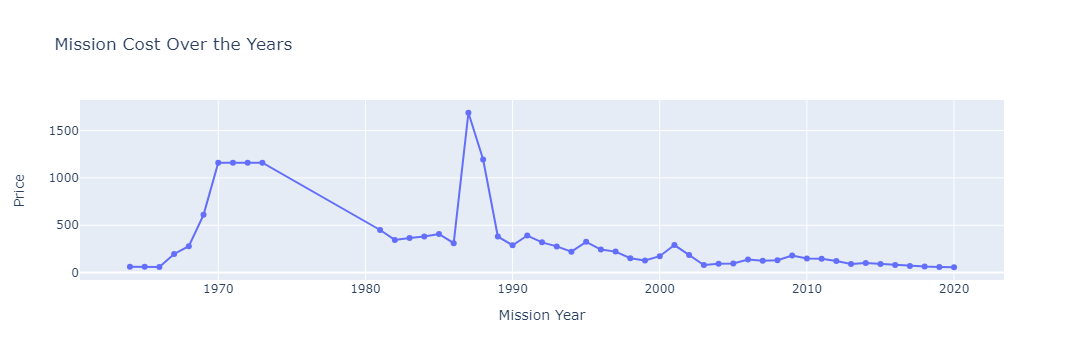

In [411]:
fig_ln = px.line(df_priceyear, x='Mission Year', y='Price', markers=True, title='Mission Cost Over the Years')
fig_ln.show()

### Note ###
During the 70's that was the stellar moment for space exploration we see how the money spent incresed significatelly then drop during the 80's with an outlier in 1987, however it looks like drom the 90's the money spent by the Countries has decreased mostly could be that the cost for a launch is not as expensive as when the exploration started.

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [425]:
top10_org = df_data.groupby(['Organisation', 'Mission Year'], as_index=False).agg({'Detail': pd.Series.count})
top10_orgmerge = top10_org.merge(df_LaunchCop[:10], on='Organisation').sort_values('count', ascending=False)
top10_orgmerge

,Organisation,Mission Year,Detail,count
233,RVSN USSR,1975,89,1777
244,RVSN USSR,1986,49,1777
237,RVSN USSR,1979,36,1777
238,RVSN USSR,1980,40,1777
239,RVSN USSR,1981,51,1777
...,...,...,...,...
167,Martin Marietta,1993,2,114
148,Martin Marietta,1974,5,114
147,Martin Marietta,1973,6,114
146,Martin Marietta,1972,5,114


In [413]:
df_LaunchCop[:10]

Organisation
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: count, dtype: int64

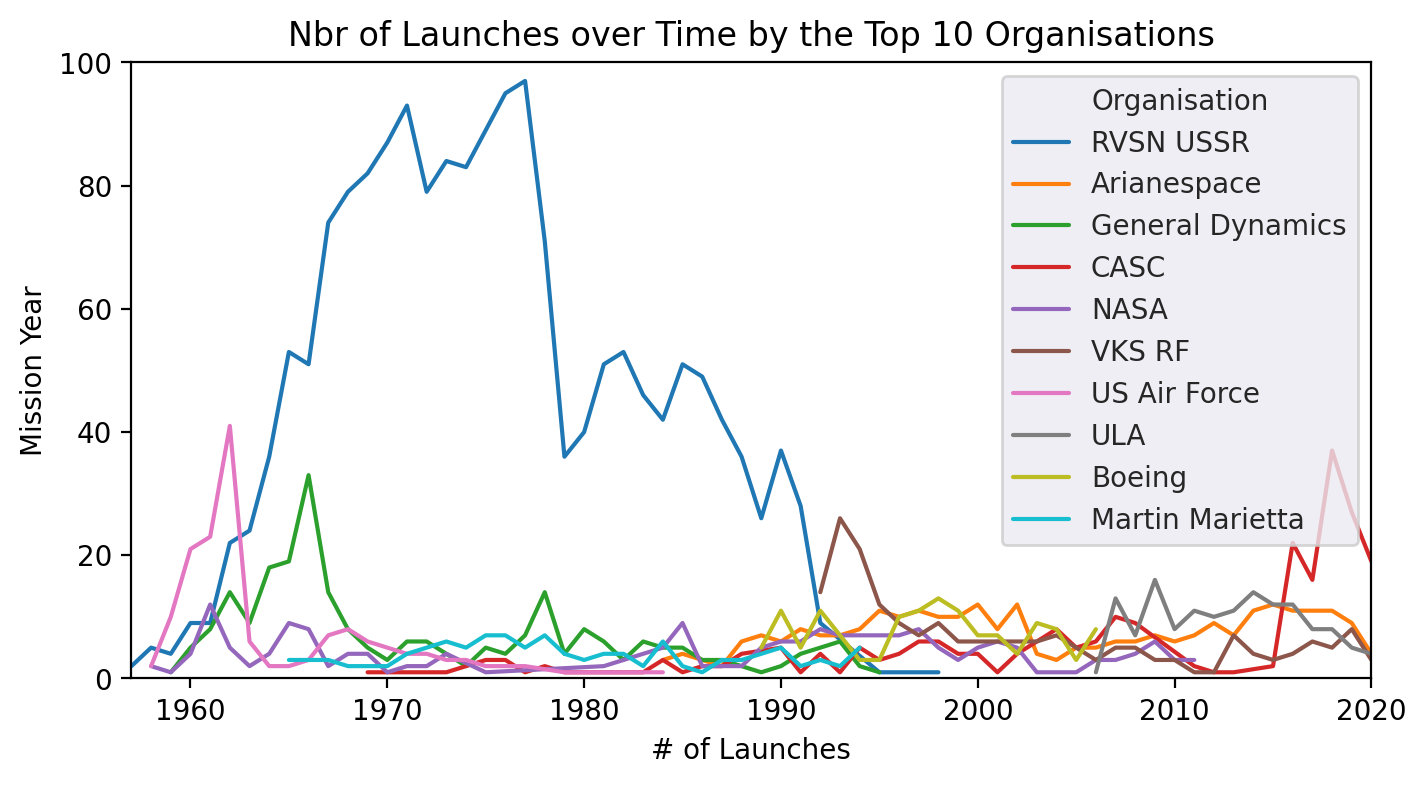

In [434]:
plt.figure(figsize=(8,4), dpi=200)
plt.title("Nbr of Launches over Time by the Top 10 Organisations")
# set styling on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.lineplot(top10_orgmerge, x='Mission Year', y='Detail', hue='Organisation')
    ax.set(ylim=(0, 100), 
           xlim=(top10_orgmerge['Mission Year'].min(), top10_orgmerge['Mission Year'].max()), 
           ylabel='Mission Year', 
           xlabel='# of Launches')
plt.show()

### Note ###
We see in the chart that the USSR was veru active in the 70's but the missions stop before 2000. NASA started a bit later than the USSR but the 
launches were more consistent until 2010. Nowadays CASC from China is in the lead.

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

### Note ###
we map Kazakhstan, Russia and Ukraine was USSR and chart the 3 of them against USA. The dataset only take in acount launches during 1957 to 1991 that it is the Cold War Period.

In [508]:
warcountry = {'Kazakhstan': 'USSR', 'Russian Federation': 'USSR' , 'Ukraine': 'USSR', 'USA': 'USA'} 


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [516]:
df_data['Cold_Country'] = df_data['Country'].apply(lambda location: warcountry[location] if location in warcountry else np.NaN)
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Mission Year,Year_Month,Cold_Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8,NaN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,8,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020,7,USSR
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,7,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,2,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,2,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957,12,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,1957,11,USSR


In [519]:
df_coldwar = df_data[df_data['Mission Year'] <= 1991]
df_coldwar.isna().values.any()

True

In [520]:
df_coldwar.shape

(2607, 12)

In [525]:
df_coldwar = df_coldwar.dropna(subset=["Cold_Country"])

In [527]:
df_coldwar.shape

(2432, 12)

In [533]:
df_pie = df_coldwar['Cold_Country'].value_counts()

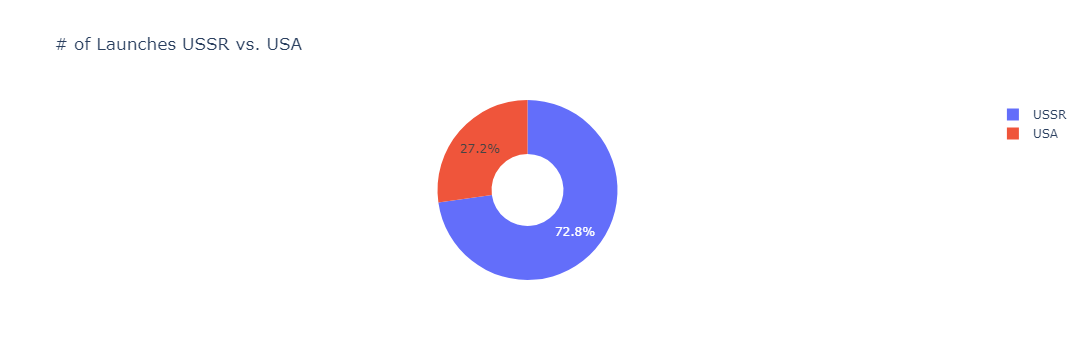

In [534]:
donut = px.pie(labels=df_pie.index, 
               values=df_pie.values, 
               title='# of Launches USSR vs. USA', 
               names=df_pie.index, 
               hole=0.4)
donut.update_traces(textposition='inside', textinfo='percent', textfont_size=12)
donut.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [539]:
launches_by_year = df_coldwar[['Mission Year', 'Cold_Country', 'Detail']].groupby(['Mission Year', 'Cold_Country'], as_index=False).count()
launches_by_year  = launches_by_year.sort_values('Mission Year')[['Mission Year', 'Cold_Country', 'Detail']]
launches_by_year

,Mission Year,Cold_Country,Detail
0,1957,USA,1
1,1957,USSR,2
2,1958,USA,23
3,1958,USSR,5
4,1959,USA,16
...,...,...,...
65,1989,USSR,26
66,1990,USA,26
67,1990,USSR,37
68,1991,USA,18


In [540]:
cumulative_launches = launches_by_year.groupby(by=['Mission Year', 'Cold_Country']).sum().groupby(level=[1]).cumsum()
cumulative_launches.reset_index(inplace=True)
cumulative_launches

,Mission Year,Cold_Country,Detail
0,1957,USA,1
1,1957,USSR,2
2,1958,USA,24
3,1958,USSR,7
4,1959,USA,40
...,...,...,...
65,1989,USSR,1704
66,1990,USA,644
67,1990,USSR,1741
68,1991,USA,662


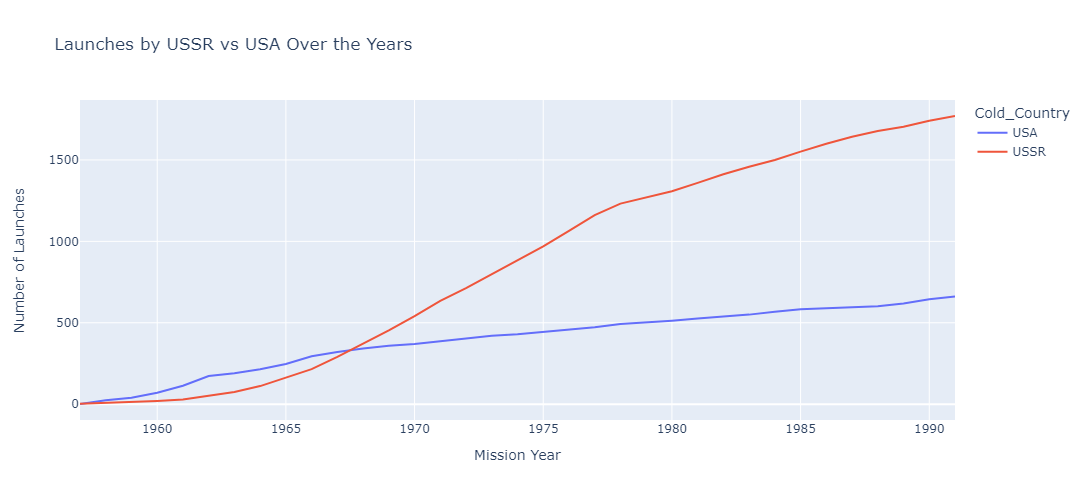

In [541]:
fig_war = px.line(cumulative_launches, 
              x="Mission Year", 
              y="Detail", 
              color='Cold_Country', 
              hover_data='Cold_Country',
              title='Launches by USSR vs USA Over the Years', 
              height=500)
fig_war.update_layout(xaxis_title='Mission Year', yaxis_title='Number of Launches')
fig_war.show()

### Note ###
It is amazing the number of launches that USSR had during the cold war however the NASA missions are more recongnized since were spread worldwide
even the Moon mission Apollo are the most famous ones since we have very little knowledge regarding anything relate to the USSR.

## Chart the Total Number of Mission Failures Year on Year.

In [544]:
df_coldfails = df_coldwar[df_coldwar['Mission_Status'] != 'Success']

In [555]:
failures_by_cat = df_coldfails.groupby(['Mission Year', 'Cold_Country', 'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count})
failures_by_cat.sort_values(by='Detail', ascending=False, inplace=True)
failures_by_cat.columns = ['Mission_Year', 'Cold_Country', 'Mission_Status', 'Failure_Cat']
failures_by_cat.head(10)

,Mission_Year,Cold_Country,Mission_Status,Failure_Cat
1,1958,USA,Failure,16
39,1969,USSR,Failure,14
8,1960,USA,Failure,14
10,1961,USA,Failure,13
46,1971,USSR,Failure,8
13,1962,USA,Failure,8
4,1959,USA,Failure,8
33,1967,USSR,Failure,8
17,1963,USSR,Failure,8
15,1962,USSR,Failure,7


In [553]:
total_failures = df_coldfails.groupby(['Mission Year', 'Cold_Country'], as_index=False).agg({'Detail': pd.Series.count})
total_failures.sort_values(by='Detail', ascending=False, inplace=True)
total_failures.columns = ['Mission_Year', 'Cold_Country', 'Total_Failures']
total_failures.head(10)

,Mission_Year,Cold_Country,Total_Failures
1,1958,USA,18
7,1961,USA,16
23,1969,USSR,15
5,1960,USA,14
20,1967,USSR,12
18,1966,USSR,11
27,1971,USSR,10
9,1962,USA,10
3,1959,USA,10
25,1970,USSR,9


In [557]:
df_merged_failure= pd.merge(failures_by_cat, total_failures, on=['Mission_Year','Cold_Country'])
df_merged_failure.head()

,Mission_Year,Cold_Country,Mission_Status,Failure_Cat,Total_Failures
0,1958,USA,Failure,16,18
1,1958,USA,Partial Failure,2,18
2,1969,USSR,Failure,14,15
3,1969,USSR,Partial Failure,1,15
4,1960,USA,Failure,14,14


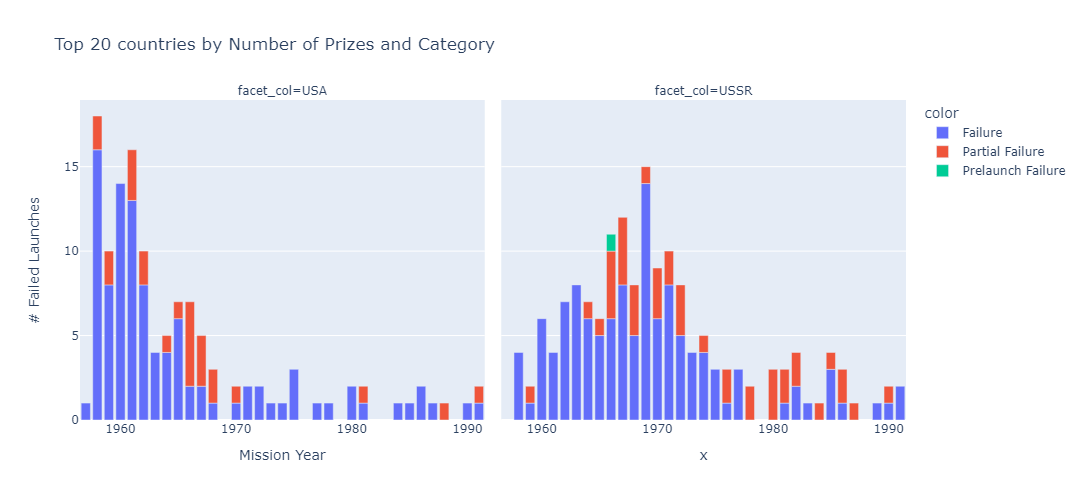

<Figure size 3200x1600 with 0 Axes>

In [565]:
plt.figure(figsize=(16,8), dpi=200)
barfail_v = px.bar(x=df_merged_failure.Mission_Year, 
                y=df_merged_failure.Failure_Cat,                
                title='Top 20 countries by Number of Prizes and Category', 
                color=df_merged_failure.Mission_Status,  
                facet_col= df_merged_failure.Cold_Country,
                height=500)
barfail_v.update_layout(xaxis_title='Mission Year', 
                   yaxis_title='# Failed Launches')
barfail_v.show()

### Note ###
Comparing the charts is very visible that USA strigle during the 60's and a lot of missions failed however 
after the 70's the missions were successful but much more less in number. The USSR started more successful but at the mid of 
the 60's the mission started to fail until the end of the cold war were it looks like most of the missions failed.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [568]:
launches_by_year.columns

Index(['Mission Year', 'Cold_Country', 'Detail'], dtype='object')

In [571]:
launches_by_year.columns = ['Mission_Year', 'Cold_Country', 'Total_Launches']
df_merge_pct = pd.merge(launches_by_year, total_failures, on=['Mission_Year','Cold_Country'])
df_merge_pct['Pct_Failure'] = df_merge_pct['Total_Failures']/df_merge_pct['Total_Launches']
df_merge_pct.head()

,Mission_Year,Cold_Country,Total_Launches,Total_Failures,Pct_Failure
0,1957,USA,1,1,1.00
1,1958,USA,23,18,0.78
2,1958,USSR,5,4,0.80
3,1959,USA,16,10,0.62
4,1959,USSR,4,2,0.50


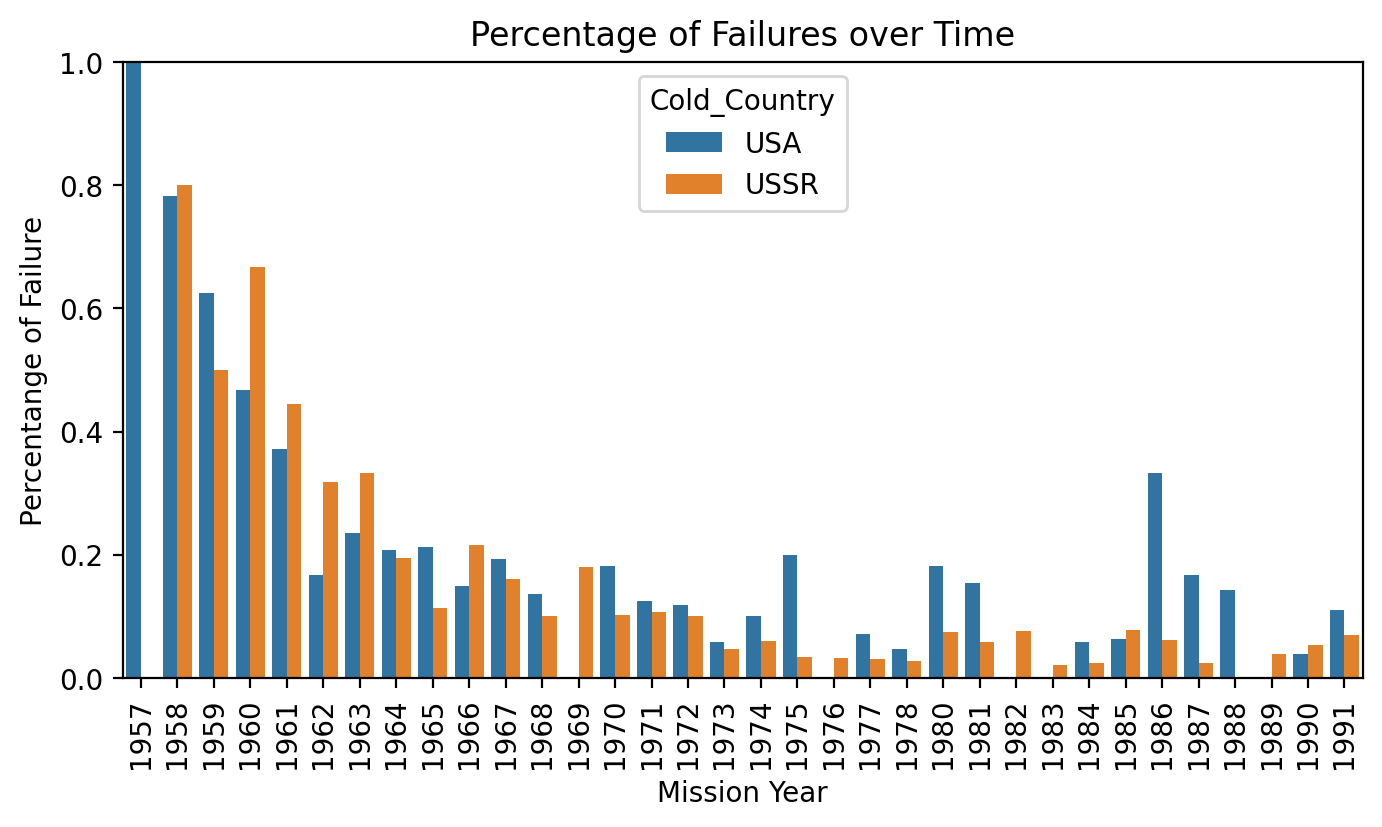

In [583]:
plt.figure(figsize=(8,4), dpi=200)
plt.xticks(fontsize=10, rotation=90)
plt.title("Percentage of Failures over Time")
ax = sns.barplot(df_merge_pct, x="Mission_Year", y="Pct_Failure", hue="Cold_Country")
ax.set(ylim=(0, 1), ylabel='Percentange of Failure', xlabel='Mission Year')
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [592]:
df_country_cm = df_data.groupby(['Country', 'Mission Year'], as_index=False).agg({'Detail': pd.Series.count})
df_country_cm.columns = ['Country', 'Mission_Year', 'Launches']
#df_country_cm = df_country_cm.groupby(['Mission_Year', 'Country']).sum().groupby(level=[1]).cumsum()
#df_country_cm.reset_index(inplace=True)
df_country_cm.head()

,Country,Mission_Year,Launches
0,Australia,1967,1
1,Australia,1968,1
2,Australia,1969,1
3,Australia,1970,2
4,Australia,1971,1


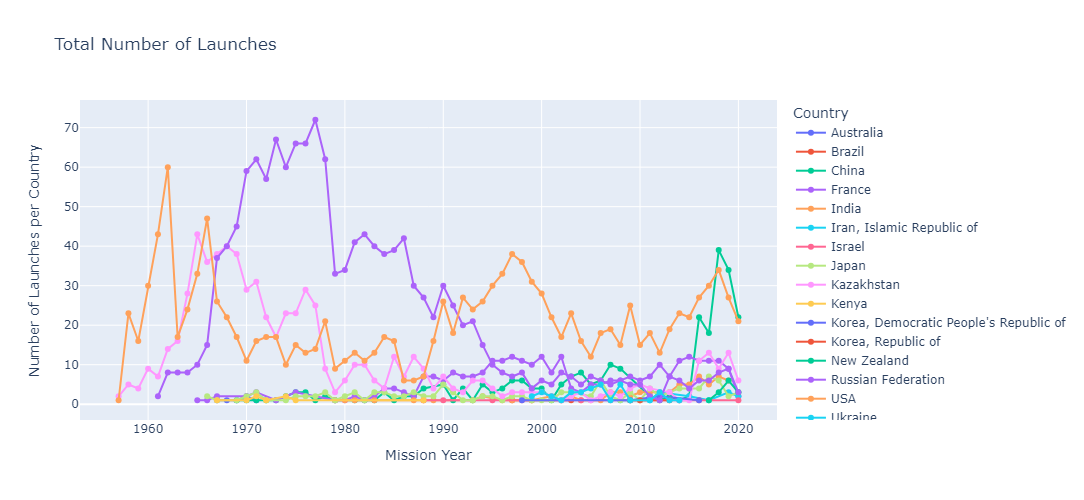

In [606]:
fig_total = px.line(df_country_cm, 
              x="Mission_Year", 
              y="Launches", 
              color='Country', 
              hover_data='Country',
              title='Total Number of Launches', 
              markers=True,
              height=500)
fig_total.update_layout(xaxis_title='Mission Year', yaxis_title='Number of Launches per Country')
fig_total.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

### Note ###
Based on the chart above and below China is the one exploring the space nowadays.

In [603]:
df_org_year = df_data.groupby(['Organisation', 'Mission Year'], as_index=False).agg({'Detail': pd.Series.count})
df_org_year.columns = ['Organisation', 'Mission_Year', 'Launches']
df_org_year

,Organisation,Mission_Year,Launches
0,AEB,1997,1
1,AEB,1999,1
2,AEB,2003,1
3,AMBA,1958,7
4,AMBA,1967,1
...,...,...,...
658,VKS RF,2020,3
659,Virgin Orbit,2020,1
660,Yuzhmash,1969,1
661,Yuzhmash,1991,1


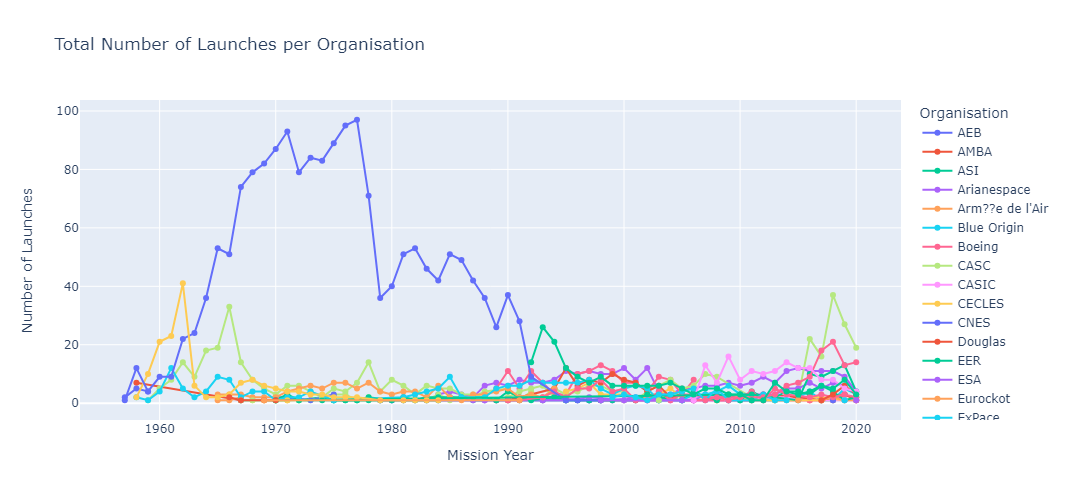

In [605]:
fig_total_org = px.line(df_org_year, 
              x="Mission_Year", 
              y="Launches", 
              color='Organisation', 
              hover_data='Organisation',
              title='Total Number of Launches per Organisation', 
              markers=True,
              height=500)
fig_total_org.update_layout(xaxis_title='Mission Year', yaxis_title='Number of Launches')
fig_total_org.show()

### Note ###
It is interesting to analyse the space journey with this data, how few organisation and countries were the pioneers in the 
exploration and how many launches the USSR had back during the cold war, also the most famous organisation NASA is not the one with most launches even during the cold war. Also we could see that the money spent by the USSR was incredible high in comparison to any other Organisation. 
Currently there are a lot more Countries and Organisations working on space exploration with China CASC in the lead.